# Black Friday (EDA) and Feature Engineering

### Cleaning and Preparing the data for model training

**Data set :** *https://www.kaggle.com/datasets/sdolezel/black-friday*

# Problem Statement
A retail company "ABC Private limied" want to understand the purchase behaviour (specifiacally,purchase amount)against various products of different categories.They have shared purchase summary of various cudtomerd for selected high volume products from last month.The dataset also contains customer demographics(age,gender,maritial  status,city type,stay in current city),product details (product id and product category) and tota purchase amount from last month.

Now,they want to build a model to predict the purchase amount of customer against product which will help them to create personalized offer for customers against different products.

In [1]:
# importing libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# importing dataset
df_train=pd.read_csv('train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
# importing the test data
df_test=pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


# Why to merge Test and Train data?
When you perform preprocessing steps such as encoding categorical variables, scaling features, or imputing missing values, it's crucial to apply the same transformations to both training and test sets. By merging them before preprocessing, you ensure that the same transformations are applied consistently.

In [4]:
# merging both train and test data
df=df_train.append(df_test)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [5]:
# Basic Code
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
df.drop(['User_ID'],axis=1,inplace=True)

In [8]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [9]:
# converting categorical variables into numerical variables(Gender)
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [10]:
# # converting categorical variables into numerical variables(Age)
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
#pd.get_dummies(df['Age'],drop_first=True)
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4, '46-50':5,'51-55':6,'55+':7})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [12]:
#converting categorical variables into numerical variables('City_Category')
df_city=pd.get_dummies(df['City_Category'],drop_first=True)
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [13]:
# updating in data set
df=pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [14]:
#drop city category feature
df.drop('City_Category',axis=1,inplace=True)

In [15]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [16]:
# Finding Missing values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [17]:
# Focusing on replacing missing values ['Product_Category_2']
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [18]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [19]:
df['Product_Category_2'].mode()[0]

8.0

In [20]:
# Best way to fix missing value with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [21]:
df['Product_Category_2'].isnull().sum()

0

In [22]:
# Focusing on replacing missing values ['Product_Category_3']
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [23]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [24]:
# Best way to fix missing value with mode
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [25]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,0,1


In [26]:
df.shape

(783667, 12)

In [27]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [28]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [29]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [31]:
# convert object into integers
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int32(1), int64(5), object(1), uint8(2)
memory usage: 64.

In [32]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


# Visualisation

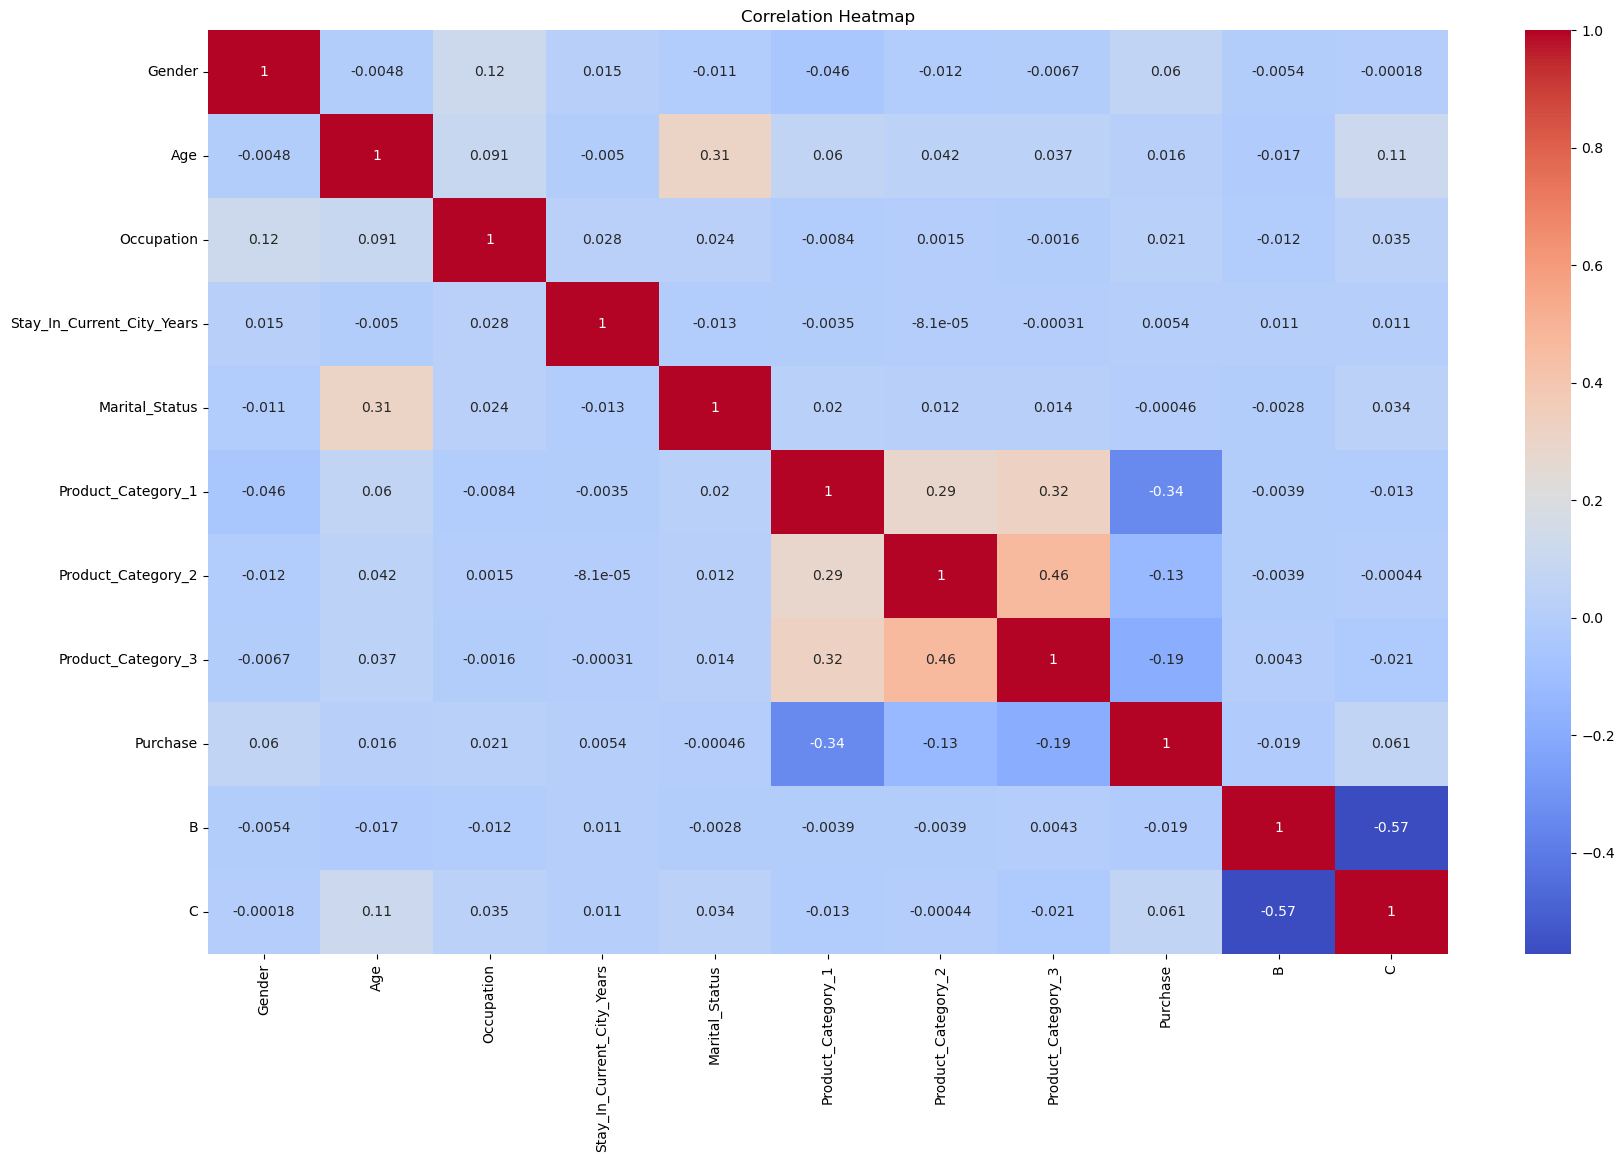

In [34]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='Age', ylabel='Purchase'>

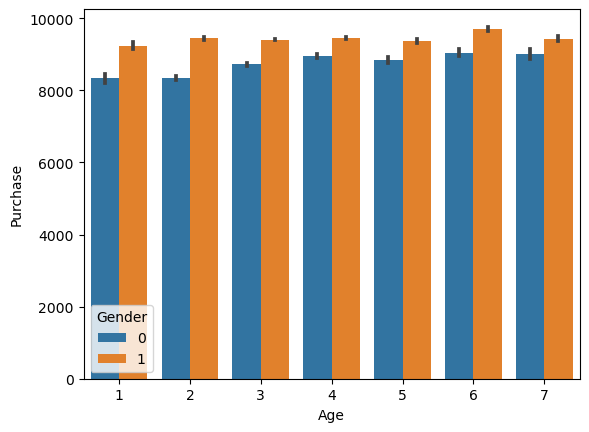

In [35]:
# visualisation
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df)

# Observation(Age group analysis)
The bar plot shows consistent purchase amounts around 10,000 across all age groups. Males generally spend slightly more than females , especially in the younger ('0-17' and '18-25') and older ('51-55') age groups. Overall, gender differences in purchase amounts are minimal.

<Axes: xlabel='Occupation', ylabel='Purchase'>

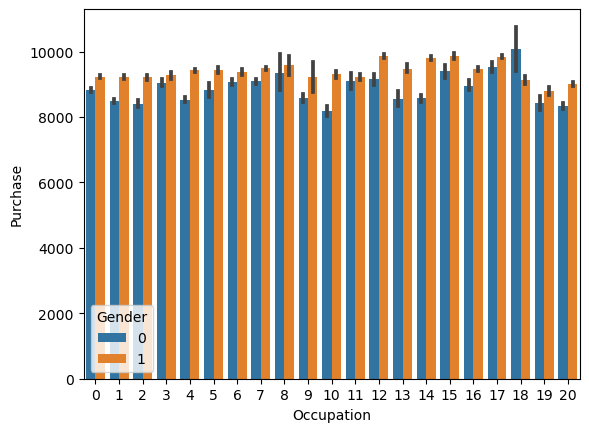

In [36]:
# Visualization of purchase with occupation
sns.barplot(x='Occupation', y='Purchase', hue='Gender', data=df)

# Observation(Gender group analysis with respect to occupation)
The bar plot shows that purchase amounts are consistently close to 10,000 across all occupations. Males (1) generally spend slightly more than females (0) across most occupations, with minimal gender differences. Occupation 17 exhibits the highest purchase amounts, particularly for males.

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

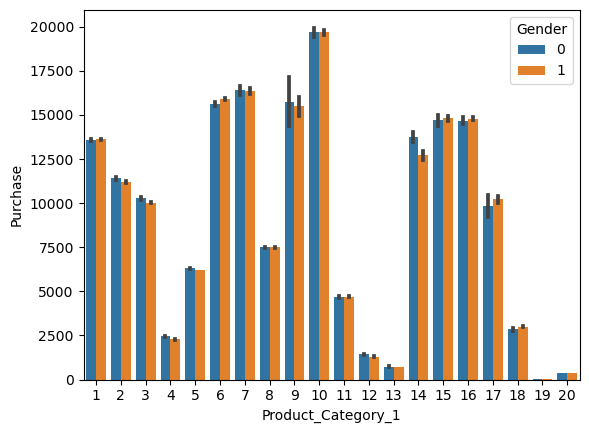

In [37]:
# Visualization of purchase with product category 1
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender', data=df)

# Observation:

1. The graph compares purchase amounts across 20 different product categories.
2. Both genders (labeled '0' for female and '1' for male) show similar purchasing behavior in most categories.
3. Purchase of 20000 is the highest purchase in product category 1

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

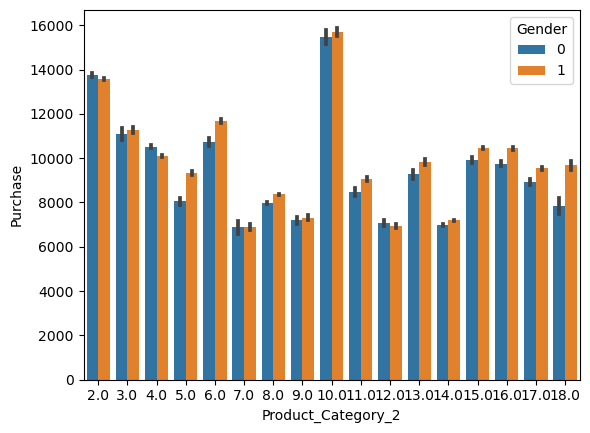

In [38]:
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender', data=df)

# Observation:
1. The chart compares purchases across 20 product categories.
2. Both genders exhibit similar purchasing behavior in most categories.
3. However, certain categories show higher purchases by male over the female.
4. Purchase of 16000 is the highest purchase in product category 2

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

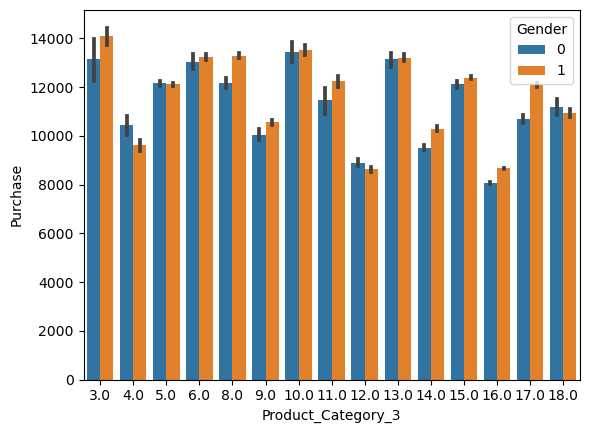

In [39]:
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender', data=df)

# Observation:
1. The chart compares purchases across 20 product categories.
2. Both genders exhibit similar purchasing behavior in most categories.
3. However, certain categories show higher purchases by male over the female.
4. Purchase of 14000 is the highest purchase in product category 3

# Feature Scaling

In [40]:
#feature scaling
df_test=df[df['Purchase'].isnull()]

In [41]:
df_train=df[~df['Purchase'].isnull()]

In [42]:
X=df_train.drop('Purchase',axis=1)

In [43]:
X.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,0,1


In [44]:
X.shape

(550068, 11)

In [48]:
y=df_train['Purchase']

In [51]:
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [52]:
y.shape

(550068,)

In [53]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [54]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [55]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
model = LinearRegression()
model.fit(X_train, y_train)
w=model.coef_
b=model.intercept_
print(w)
print(b)

[  219.40340889   161.48399281    40.75197867    13.00328258
   -29.40171369 -1595.03999038    -6.24829968  -421.6489872
    76.37138564   311.82740972]
9260.52247622407


In [58]:
predictions=model.predict(X_test)
predictions

array([11827.531432  , 10472.23195058,  7361.92482116, ...,
       10419.50288826, 11647.9911962 , 10649.86876652])

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
RF = RandomForestRegressor(n_estimators=10,max_depth=7,n_jobs=-1,random_state=42)
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=7, n_estimators=10, n_jobs=-1, random_state=42)

In [61]:
y_pred = RF.predict(X_test)
y_pred

array([14016.17996129, 13135.09448766,  7456.30144271, ...,
       10955.11045018, 13635.39507425, 13049.79610859])

In [62]:
y_test

84432     19142.0
72724     15513.0
197032     7802.0
353704    15455.0
91198      4492.0
           ...   
196106     9787.0
109474     3198.0
433228     5434.0
271831    19051.0
477613    11896.0
Name: Purchase, Length: 181523, dtype: float64

In [63]:
!pip install xgboost

In [64]:
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [65]:
MAE = mean_absolute_error(y_test,y_pred)
MAE

2251.5095883261993

In [66]:
r2_score(y_test, y_pred)

0.6455783444986215

In [67]:
print(mean_squared_error(y_test, y_pred))

8932343.00787203


In [68]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

2988.7025626301506


In [69]:
y.mean()

9263.968712959126

In [70]:
y_test.mean()

9270.965585628268

In [71]:
xgb_reg=XGBRegressor(n_estimators=480, learning_rate=0.2, max_depth=8)
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=480, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [72]:
xgb_y_pred=xgb_reg.predict(X_test)

In [73]:
print("RMSE:",np.sqrt(mean_squared_error(y_test, xgb_y_pred)))
print("y_mean",(y.mean()))
print("R2 Score:",round(r2_score(y_test,xgb_y_pred)*100,2))

RMSE: 2891.572951339873
y_mean 9263.968712959126
R2 Score: 66.82


### **Summary:**
**RMSE of 2891.57** indicates that, on average, our model's predictions are off by about 2891.57 units from the actual values.
**R² of 66.82%** shows that our model explains 66.82% of the variance in the target variable, which suggests a moderately strong model, but there may still be room for improvement.
The **mean value of 9263.97** provides a reference to compare the RMSE and understand the scale of errors relative to the overall dataset.
